In [ ]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from zipfile import ZipFile
with ZipFile("FER.zip", 'r') as zip_ref:
    zip_ref.extractall("fer_dataset")


In [ ]:
train_dir = "/content/fer_dataset/train"
test_dir = "/content/fer_dataset/test"


In [ ]:
def count_images(folder):
    total = 0
    for subfolder in os.listdir(folder):
        path = os.path.join(folder, subfolder)
        total += len(os.listdir(path))
    return total

train_images = count_images("/content/fer_dataset/train")
test_images = count_images("/content/fer_dataset/test")

print("Total training images:", train_images)
print("Total testing images:", test_images)


Total training images: 21005
Total testing images: 5212


In [ ]:
def count_images_per_class(folder_path):
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            print(f"{class_name}: {count} images")

print("Training Images:")
count_images_per_class("/content/fer_dataset/train")

print("\nTesting Images:")
count_images_per_class("/content/fer_dataset/test")

Training Images:
sad: 4830 images
happy: 7215 images
neutral: 4965 images
angry: 3995 images

Testing Images:
sad: 1247 images
happy: 1774 images
neutral: 1233 images
angry: 958 images


In [ ]:
original_dir = "/content/fer_dataset/train"
target_dir = "/content/fer_custom_split"

classes = ['angry', 'happy', 'neutral', 'sad']
for subset in ['train', 'test', 'val']:
    for cls in classes:
        os.makedirs(os.path.join(target_dir, subset, cls), exist_ok=True)


In [ ]:
for cls in classes:
    class_path = os.path.join(original_dir, cls)
    images = os.listdir(class_path)
    random.shuffle(images)

    train_imgs = images[:1000]
    test_imgs = images[1000:2000]
    val_imgs = images[2000:2500]

    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(target_dir, 'train', cls, img))

    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(target_dir, 'test', cls, img))

    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(target_dir, 'val', cls, img))


In [ ]:
for subset in ['train', 'test', 'val']:
    print(f"\n{subset.upper()} SET")
    for cls in classes:
        count = len(os.listdir(os.path.join(target_dir, subset, cls)))
        print(f"{cls}: {count} images")



TRAIN SET
angry: 1000 images
happy: 1000 images
neutral: 1000 images
sad: 1000 images

TEST SET
angry: 1000 images
happy: 1000 images
neutral: 1000 images
sad: 1000 images

VAL SET
angry: 500 images
happy: 500 images
neutral: 500 images
sad: 500 images


In [ ]:
data_dir = "/content/fer_dataset"
img_size = (48, 48)
batch_size = 32


In [ ]:
#For training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

#For Validation
val_datagen = ImageDataGenerator(rescale=1./255)

#For Testing
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'train'),
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'train'),
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)


Found 16804 images belonging to 4 classes.
Found 4201 images belonging to 4 classes.


In [ ]:
from keras import models
from keras import layers

In [ ]:
modelCNN=models.Sequential()

In [ ]:
modelCNN.add(layers.Conv2D(32,(3, 3), activation='relu',input_shape=(48, 48, 1)))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(256, (3, 3), activation='relu'))
modelCNN.add(layers.Flatten())
#Now Used Dense Layer To Find Correct Output
modelCNN.add(layers.Dense(512, activation='relu'))
modelCNN.add(layers.Dropout(0.3))
modelCNN.add(layers.Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelCNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 914,692 (3.49 MB)

 Trainable params: 914,692 (3.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelCNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
History = modelCNN.fit(train_generator,epochs=30,
    validation_data=val_generator
)


Epoch 1/30
526/526 ━━━━━━━━━━━━━━━━━━━━ 78s 148ms/step - acc: 0.3975 - loss: 1.2870 - val_acc: 0.5251 - val_loss: 1.0991
Epoch 2/30
526/526 ━━━━━━━━━━━━━━━━━━━━ 83s 158ms/step - acc: 0.5305 - loss: 1.0693 - val_acc: 0.5499 - val_loss: 1.0238
Epoch 3/30
526/526 ━━━━━━━━━━━━━━━━━━━━ 77s 147ms/step - acc: 0.5743 - loss: 0.9888 - val_acc: 0.5534 - val_loss: 1.0399
Epoch 4/30
526/526 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - acc: 0.6089 - loss: 0.9248 - val_acc: 0.5980 - val_loss: 0.9435
Epoch 5/30
526/526 ━━━━━━━━━━━━━━━━━━━━ 77s 147ms/step - acc: 0.6362 - loss: 0.8751 - val_acc: 0.5980 - val_loss: 0.9352
Epoch 6/30
526/526 ━━━━━━━━━━━━━━━━━━━━ 77s 146ms/step - acc: 0.6609 - loss: 0.8154 - val_acc: 0.6096 - val_loss: 0.9196
Epoch 7/30
526/526 ━━━━━━━━━━━━━━━━━━━━ 83s 149ms/step - acc: 0.6820 - loss: 0.7696 - val_acc: 0.6089 - val_loss: 0.9661
Epoch 8/30
526/526 ━━━━━━━━━━━━━━━━━━━━ 77s 146ms/step - acc: 0.7067 - loss: 0.7272 - val_acc: 0.6239 - val_loss: 0.9206
Epoch 9/30
526/526 ━━━━━━━━━━━━━

In [ ]:
final_train_acc = History.history['acc'][-1]
final_val_acc = History.history['val_acc'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Final Training Accuracy: 0.9624
Final Validation Accuracy: 0.6075


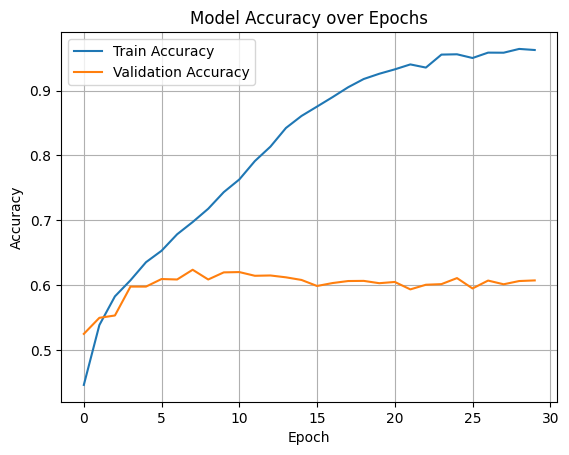

In [ ]:
plt.plot(History.history['acc'], label='Train Accuracy')
plt.plot(History.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
modelCNN.save("emotion.h5")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("emotion.h5")


In [ ]:
from PIL import Image
import numpy as np

img = Image.open("happy.jpeg").convert('L')  
img = img.resize((48, 48))  
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 48, 48, 1)  


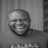

In [ ]:
img

In [ ]:
class_labels = ['angry', 'happy', 'neutral', 'sad']

In [ ]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print("Predicted Emotion:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted Emotion: happy


In [ ]:

image = Image.open("angry.jpg").convert('L') 
image = image.resize((48, 48))  
image_array = np.array(image) / 255.0
image_array = image_array.reshape(1, 48, 48, 1) 


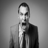

In [ ]:
image

In [ ]:
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions)
print("Predicted Emotion:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Emotion: angry
